<a href="https://colab.research.google.com/github/ColeHenson/Data-Science24-25/blob/main/Copy_of_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

With only one model, the elpd_loo still produces a k diagnostic and standard error, but the k diagnostic value is effectively meaningless without another k diagnostic from another model to compare it to.

**Task2**:

Describe overfitting, in the context of this course

Overfitting the data is using too many different variables in the model. When too many different variables are used to create a model, the model begins to simply predict the data we already have and is unable to handle new data.

**Task3**:

How do we mitigate overfitting?

We can mitigate overfitting by choosing the model with the least number of variables and using weak regularizing priors for the model we select.

**Task4**:

How do we mitigate underfitting?

Selecting a model based on elpd_loo allows us to pick the most accurate model. An accurate model also happens to be one that mitigates underfitting.

**Task5**:

Why would we want more than one predictor in a model?

There are more often too many different factors that impact a dependent variable so by using more than one predictor in a model, we can better capture the causes of variation in the data.

**Task6**:

Can we have too many predictors? How would we now?

When there are too many predictors in a model, there is more uncertainty in the end result. We know we have too many predictors if the model won't run or if we start using predictors that have more tenuous relationships with what we are trying to predict. The goal in our predictors is to choose just the things we think are most directly relevant to the model.

**Task7**:

What is variable selection, and how does it work?

Variable selection is done using causual DAG's. Essentially we go through the variables we have and think about what variables have a causual relationship with other variables. We also decide which relationships are strongest. This is what Mr. Arredondo explained on the board.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

All three models from the basketball data set captured the general differences in the relationships between the different positions and FG%, however only the hhierarchical model and the interation model were able to capture differences in the slopes of the FG%s of the different positons. The heirarchical model has more variance likely because it a more complex model especially relative to the standard model. Futhermore, while the standard model assumes that the different categorical variables are fundementally doing the same thing while the heirarchical model makes the same assumption but is better able to find differences between the positions. The Interactions model throws that assumption out of the window and is similar to running different models for different categorical variables.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

We can visualize multiple linear regression models by using different colors to correspond with different values for variables or by simply printing out a bunch of different plots that are assigned to different values. The group of different plots are like slices from a 3 dimentional plot. We can't visualize the entirety of a model at the same time for all models but colors help for getting a lot of different variables in a single plot.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

In [3]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi
import bambi as bmb

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-dnabt64e
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-dnabt64e
  Resolved https://github.com/pydata/xarray.git to commit 6bea71572120c0eef2e4bf8d269d32b17a39dc35
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


You may use the following two code blocks to load and clean the data.

In [4]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [5]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [10]:
#predictors free throw percentage and position (with position as a categorical predictor)
model_bb_pos = bmb.Model("`FGp` ~ Pos + FTp", data=bb)
#create the model
idata_bb_pos = model_bb_pos.fit(idata_kwargs={'log_likelihood': True})
#predictors free throw percentage and position (with position as a hierarchy)
model_bb_pos_h = bmb.Model("`FGp` ~ 'Pos' + FTp + (`FTp`|Pos)", data=bb)
#create the model
idata_bb_pos_h = model_bb_pos_h.fit(idata_kwargs={'log_likelihood': True})
#predictors free throw percentage and position (with position interacting with free throw percentage)
model_bb_inter = bmb.Model("`FGp` ~ `Pos` + FTp +`FTp`:Pos", data=bb)
#create the model
idata_bb_inter = model_bb_inter.fit(idata_kwargs={'log_likelihood': True})
#predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
model_bb_inter_1 = bmb.Model("`FGp` ~ `Pos` + FTp + `3PA` + `FTp`:Pos:`3PA`", data=bb)
#create the model
idata_bb_inter_1 = model_bb_inter_1.fit(idata_kwargs={'log_likelihood': True})
#predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.
model_bb_inter_2 = bmb.Model("`FGp` ~ `Pos` + FTp + `3PA` + `3PA`:Pos", data=bb)
#create the model
idata_bb_inter_2 = model_bb_inter_2.fit(idata_kwargs={'log_likelihood': True})


Output()

Output()

Output()

Output()

ERROR:pymc.stats.convergence:There were 286 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Output()

Output()

Output()

Output()

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

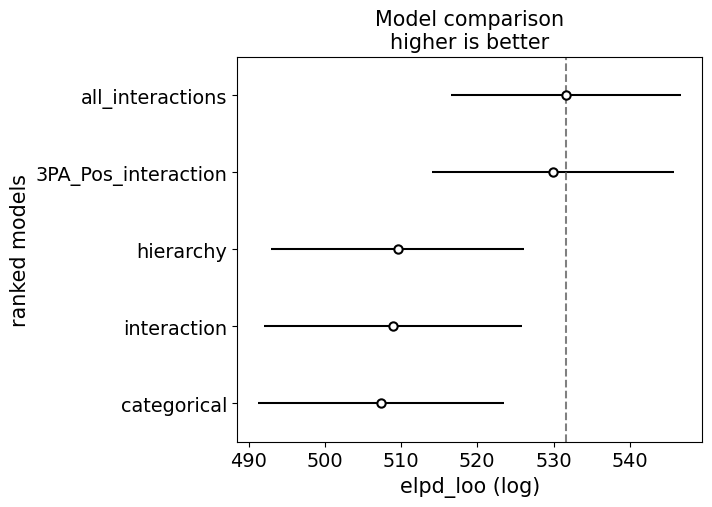

In [11]:
#comparison
cmp_df_bmb = az.compare( {"categorical":idata_bb_pos, "hierarchy":idata_bb_pos_h, "interaction":idata_bb_inter,
    "all_interactions":idata_bb_inter_1,
    "3PA_Pos_interaction":idata_bb_inter_2
} )
az.plot_compare(cmp_df_bmb)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

The model with the largest elpd_loo is the all interactions model followed by the 3PA/position interaction model. This makes sense to me because the position interacts a lot with all elements of how players play. Furthermore, players that have a lot of free throw attempts are going to have a different FGp than other players because the types of shots they are taking are fundementally different and thus the FGp is measuring different actions.